<H1 align='center'>ANÁLISE DE INTERNAÇÕES</H1>



<H3  align='center'>SECRETARIA DE SAÚDE DO DISTRITO FEDERAL</H3>


![](images/SES_DF.jpg)

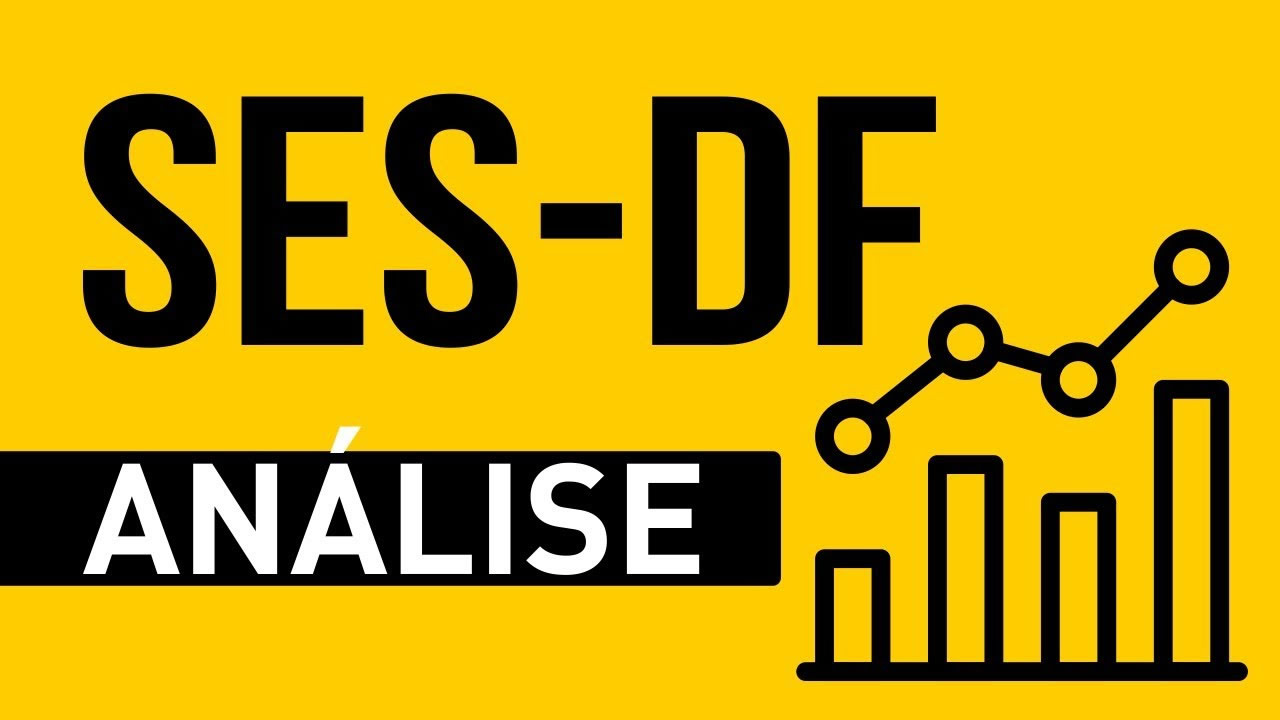


<div style="text-align: justify">Este programa se trata da análise de dados das internações de pacientes de todos os estabelecimentos de saúde da Secretaria de Saúde do DF de 2010 à 2018.
Os dados foram obtidos do DataSUS que é o departamento de informática do Sistema Único de Saúde(SUS) subordinado ao Ministério da saúde. Os dados foram coletados no formato (.dbc), então foram descompressados para o formato dBase III (.dbf) e posteriormente convertidos em DataFrames do Pandas e finalmente convertidos para (.csv) Comma-separated Values.</div>

**Objetivos :**

- Analisar as relações entre internações com estabelecimentos de saúde
- Verificar Procedência de pacientes nos estabelecimentos
- Relacionar os custos de procedimentos e de internações
- Fazer a previsão da quantidade de internações para 2019 (Machine Learning)

A visualização dos Dados será feita no Microsoft Power BI, neste notebook irei limpar, tratar, manipular os dados para visualização em outra plataforma.

**Origem dos Dados:**

Os dados foram coletados da base de dados do Portal da Saúde do SUS no link de "Transferência de Arquivos", no qual pude obter todas as internações do DF de 2010 à 2018.

Link: <http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1&acao=25>

Os dados aqui coletados refletem um total de ~20 milhões de linhas de dados, posteriormente reduzidos.

**InovaSES**

![](images/INOVASES-DF.png)

Este projeto possui apoio do InovaSES  <http://www.saude.df.gov.br/inovases-quem-somos/>

Apoio para novas experiências, projetos inovadores e empreendedorismo de servidores da Secretaria de Saúde.
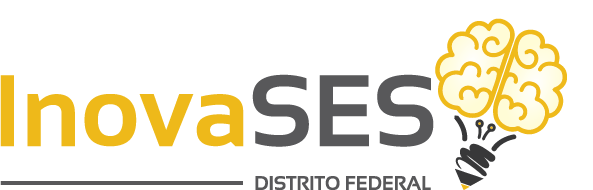

## 1- Obtenção dos Dados

**Import**

Imports de bibliotecas e associação dos arquivos dBase III (.dbf) na lista 'files' utilizando a função (glob)

In [2]:
import pandas as pd
from simpledbf import Dbf5
import glob
import numpy as np

In [3]:
files = glob.glob('DBF_NAIH\\*.dbf')
files[0:10]

['DBF_NAIH\\SPDF1001.dbf',
 'DBF_NAIH\\SPDF1002.dbf',
 'DBF_NAIH\\SPDF1003.dbf',
 'DBF_NAIH\\SPDF1004.dbf',
 'DBF_NAIH\\SPDF1005.dbf',
 'DBF_NAIH\\SPDF1006.dbf',
 'DBF_NAIH\\SPDF1007.dbf',
 'DBF_NAIH\\SPDF1008.dbf',
 'DBF_NAIH\\SPDF1009.dbf',
 'DBF_NAIH\\SPDF1010.dbf']

**Transformação dos Dados**

Para a manipulação dos arquivos (.dbf) dBase III foi escolhido a biblioteca Python do projeto Simpledbf mantido no repositório Python <https://pypi.org/project/simpledbf/> do site PyPI. 

Então foram transformados todos os arquivos (.dbf) em Dataframe do Pandas utilizando a função Dbf5().to_dataframe(), excluindo-se todas as colunas selecionadas na lista (columns_excl) e removidas com (drop). Após a transformação foi inserido cada Dataframe na variável (df_int) em forma de lista.

O codec "latin-1" foi utilizado devido o formato da informação original nos arquivos dBase III.


**Dataset Original SUS**

O Dataset original possui 37 colunas, mas iremos obter somente 9 que são de vital importância para a análise. 
Elas são:

- Ano da Internação (SP_AA)
- Mês da Internação (SP_MM)
- Código do Estabelecimento de Saúde (SP_CNES)
- Código da Internação (SP_NAIH)
- Data de Internação do Paciente (SP_DTINTER)
- Data da Alta do Paciente (SP_DTSAIDA)
- Quantidade de Atos Profissionais (SP_QTD_ATO)
- Valor de Cada Ato Profissional (SP_VALATO)
- Procedência do Paciente DF ou Fora do DF (SP_DES_HOS)

In [4]:
df_int = []
columns_excl=['SP_GESTOR', 'SP_UF', 'SP_PROCREA', 'SP_NUM_PR', 'SP_TIPO',
       'SP_CPFCGC', 'SP_ATOPROF', 'SP_TP_ATO', 'SP_PTSP',
       'SP_NF', 'SP_M_HOSP', 'SP_M_PAC', 'SP_DES_PAC', 'SP_COMPLEX',
       'SP_FINANC', 'SP_CO_FAEC', 'SP_PF_CBO','SP_PF_DOC', 'SP_PJ_DOC', 
       'IN_TP_VAL', 'SEQUENCIA', 'REMESSA', 'SP_CIDPRI', 
       'SP_CIDSEC', 'SP_QT_PROC', 'SP_U_AIH']

for file in files:
    df_int.append(Dbf5(file, codec='latin-1').to_dataframe().drop(columns_excl,axis=1))
    
    print(file[-12:]+' processado.')

SPDF1001.dbf processado.
SPDF1002.dbf processado.
SPDF1003.dbf processado.
SPDF1004.dbf processado.
SPDF1005.dbf processado.
SPDF1006.dbf processado.
SPDF1007.dbf processado.
SPDF1008.dbf processado.
SPDF1009.dbf processado.
SPDF1010.dbf processado.
SPDF1011.dbf processado.
SPDF1012.dbf processado.
SPDF1101.dbf processado.
SPDF1102.dbf processado.
SPDF1103.dbf processado.
SPDF1104.dbf processado.
SPDF1105.dbf processado.
SPDF1106.dbf processado.
SPDF1107.dbf processado.
SPDF1108.dbf processado.
SPDF1109.dbf processado.
SPDF1110.dbf processado.
SPDF1111.dbf processado.
SPDF1112.dbf processado.
SPDF1201.dbf processado.
SPDF1202.dbf processado.
SPDF1203.dbf processado.
SPDF1204.dbf processado.
SPDF1205.dbf processado.
SPDF1206.dbf processado.
SPDF1207.dbf processado.
SPDF1208.dbf processado.
SPDF1209.dbf processado.
SPDF1210.dbf processado.
SPDF1211.dbf processado.
SPDF1212.dbf processado.
SPDF1301.dbf processado.
SPDF1302.dbf processado.
SPDF1303.dbf processado.
SPDF1304.dbf processado.


**Visão geral do primeiro Dataframe da lista (df_int[0])**

In [5]:
df_int[0].head(50)

,SP_AA,SP_MM,SP_CNES,SP_NAIH,SP_DTINTER,SP_DTSAIDA,SP_QTD_ATO,SP_VALATO,SP_DES_HOS,SERV_CLA L
0,2010,01,0010456,5309101309644,20091203,20091218,1,239.23,1,NaN
1,2010,01,0010456,5309101309644,20091203,20091218,1,46.66,1,NaN
2,2010,01,0010456,5309101309644,20091203,20091218,1,13.99,1,NaN
3,2010,01,0010456,5309101309644,20091203,20091218,1,9.33,1,NaN
4,2010,01,0010456,5309101309644,20091203,20091218,1,42.00,1,NaN
5,2010,01,0010456,5309101309644,20091203,20091218,1,214.20,1,NaN
6,2010,01,0010456,5309101309644,20091203,20091218,15,93.34,1,NaN
7,2010,01,0010456,5309101309644,20091203,20091218,15,180.00,1,NaN
8,2010,01,0010456,5309101309644,20091203,20091218,11,267.13,1,NaN
9,2010,01,0010456,5309101309644,20091203,20091218,1,0.00,1,NaN


**Concatenação dos Dados**

Para melhores análise precisamos unir todos os 108 Dataframes em um só utilizando a função do pandas (concat).
Conforme verificado no Dataframe restou-se uma coluna com valores nulos sem importância para a análise (SERV_CLAL), e para removê-la utilizamos a função (drop).

Após concatenarmos todos os Dataframes verificamos que no momento havia 20.379.185 linhas de dados no único e novo Dataframe (df_int).

In [6]:
df_int = pd.concat(df_int)

In [7]:
df_int.drop(df_int.columns[9],axis=1,inplace=True)

In [8]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20376185 entries, 0 to 199618
Data columns (total 9 columns):
SP_AA         object
SP_MM         object
SP_CNES       object
SP_NAIH       object
SP_DTINTER    object
SP_DTSAIDA    object
SP_QTD_ATO    int64
SP_VALATO     float64
SP_DES_HOS    object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ GB


**Conversão**

Aqui convertemos algumas colunas do tipo string em inteiro para melhor análise posterior:
- 'SP_CNES' : Número do estabelecimento
- 'SP_NAIH' : Número da internação do paciente
- 'SP_DES_HOS': Procedência do paciente (DF ou Fora do DF)

Logo após identificamos se há valores nulos no Dataset.

In [9]:
for col in ['SP_CNES','SP_NAIH','SP_DES_HOS']:
    df_int[col] = df_int[col].astype('int64')

In [10]:
df_int.isnull().sum()

SP_AA         0
SP_MM         0
SP_CNES       0
SP_NAIH       0
SP_DTINTER    0
SP_DTSAIDA    0
SP_QTD_ATO    0
SP_VALATO     0
SP_DES_HOS    0
dtype: int64

## 2- Valor Mensal das Internações 

 **Criação do Arquivo de Valores Mensais**
 
 *Para análise futura foi criado um arquivo à parte com valores totais por cada mês e ano em separado.*
 
Primeiro agrupa os dados por ano (SP_AA) e mês (SP_MM) e agrega custos de internação (SP_VALATO) somando-os. 
Posterioremente cria um campo (DATE) formado por ano e mês e descarta as colunas (SP_AA) e (SP_MM).
Por fim salva o arquivo no formato (.csv)

In [12]:
df_value_month = df_int.groupby(['SP_AA','SP_MM'],as_index = False)['SP_VALATO'].sum()

In [13]:
df_value_month['DATE'] = pd.to_datetime(df_value_month['SP_AA'] + df_value_month['SP_MM'].apply(lambda x: x.zfill(2)), format='%Y%m')
df_value_month.drop(columns = ['SP_AA','SP_MM'],axis=1, inplace=True)

In [14]:
df_value_month.columns = ['VALOR_MENSAL','DATE']
df_value_month.to_csv('INT_VALOR_MENSAL.csv')

## 3- Manipulação e Transformação dos Dados

*Iremos manipular linhas e colunas do Dataframe e criar 2 novos Datasets CSV:
- **Int_2010_to_2018.csv**: Dataset com todas as informações sobre internações do DF
- **INT_VALOR_MENSAL.csv**: Dataset com o Valor e Quantidade de internações por mês e ano

**Agrupamento de Linhas**

O Dataframe possui mais de 20 milhões de linhas para resumir utilizei a coluna de Internação ('SP_NAIH') que é um número único para cada internação de cada paciente.
No total consegui reduzir de ~20 milhões para 1.685.512 milhão de linhas. Para isso utilizei as funçoes (groupby) e (agg) agregando os campos pelo primeiro parâmetro encontrado (first) ou por soma (sum).

In [25]:
df_int_new = df_int.groupby('SP_NAIH',as_index = False).agg({
                                 'SP_AA': 'first',
                                 'SP_MM': 'first',
                                 'SP_CNES':'first', 
                                 'SP_DTINTER': 'first',
                                 'SP_DTSAIDA': 'first',
                                 'SP_QTD_ATO': 'sum',
                                 'SP_VALATO': 'sum',
                                 'SP_DES_HOS': 'first'})

In [26]:
df_int_new.head()

,SP_NAIH,SP_AA,SP_MM,SP_CNES,SP_DTINTER,SP_DTSAIDA,SP_QTD_ATO,SP_VALATO,SP_DES_HOS
0,5309100004120,2010,01,10464,20091202,20100108,112,1199.71,0
1,5309100026318,2010,05,10464,20100410,20100422,35,447.68,0
2,5309100040783,2010,01,10464,20091117,20091119,4,262.54,0
3,5309100040838,2010,01,10464,20091116,20091123,20,834.02,0
4,5309100040849,2010,01,10464,20091109,20091116,29,538.45,0


In [27]:
#Renomeia as colunas para um nome mais amigável
df_int_new.columns = ['NAIH','ANO','MES','CNES','DTINTER','DTSAIDA','QTD_PROD','VALOR_AIH','DF']

In [28]:
df_int_new.head()

,NAIH,ANO,MES,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF
0,5309100004120,2010,01,10464,20091202,20100108,112,1199.71,0
1,5309100026318,2010,05,10464,20100410,20100422,35,447.68,0
2,5309100040783,2010,01,10464,20091117,20091119,4,262.54,0
3,5309100040838,2010,01,10464,20091116,20091123,20,834.02,0
4,5309100040849,2010,01,10464,20091109,20091116,29,538.45,0


**Criação do campo DATE**

In [29]:
df_int_new['DTSAIDA'] = pd.to_datetime(df_int_new['DTSAIDA'], format='%Y%m%d')
df_int_new['DTINTER'] = pd.to_datetime(df_int_new['DTINTER'], format='%Y%m%d')

In [30]:
#Utilização da função zfill para preencher mêses com 1 caratér (ex: Janerio 1, Fevereiro 2)
df_int_new['DATE'] = pd.to_datetime(df_int_new['ANO'] + df_int_new['MES'].apply(lambda x: x.zfill(2)) + '01', format='%Y%m%d')

In [31]:
df_int_new.head()

,NAIH,ANO,MES,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF,DATE
0,5309100004120,2010,01,10464,2009-12-02,2010-01-08,112,1199.71,0,2010-01-01
1,5309100026318,2010,05,10464,2010-04-10,2010-04-22,35,447.68,0,2010-05-01
2,5309100040783,2010,01,10464,2009-11-17,2009-11-19,4,262.54,0,2010-01-01
3,5309100040838,2010,01,10464,2009-11-16,2009-11-23,20,834.02,0,2010-01-01
4,5309100040849,2010,01,10464,2009-11-09,2009-11-16,29,538.45,0,2010-01-01


In [32]:
#Exclui a coluna ANO e MES por terem perdido a necessidade
df_int_new.drop(columns = ['ANO','MES'],axis=1, inplace=True)

In [33]:
df_int_new

,NAIH,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF,DATE
0,5309100004120,10464,2009-12-02,2010-01-08,112,1199.71,0,2010-01-01
1,5309100026318,10464,2010-04-10,2010-04-22,35,447.68,0,2010-05-01
2,5309100040783,10464,2009-11-17,2009-11-19,4,262.54,0,2010-01-01
3,5309100040838,10464,2009-11-16,2009-11-23,20,834.02,0,2010-01-01
4,5309100040849,10464,2009-11-09,2009-11-16,29,538.45,0,2010-01-01
5,5309100040904,10464,2009-11-27,2009-12-09,22,482.45,0,2010-01-01
6,5309100040970,10464,2009-12-08,2009-12-09,7,786.02,0,2010-01-01
7,5309100041069,10464,2009-12-04,2009-12-15,70,723.84,1,2010-01-01
8,5309100041135,10464,2009-12-13,2009-12-14,8,1040.19,0,2010-01-01
9,5309100041146,10464,2009-11-24,2009-12-01,24,834.02,1,2010-01-01


In [277]:
#Salvamento temporário
df_int_new.to_csv("INT_2010_to_2018.csv", index=False )

**Criação do campo QTD_NAIH em INT_VALOR_MENSAL.csv**

*Devido a necessidade de um campo da inclusão do Número de internações (QTD_NAIH) em INT_VALOR_MENSAL.csv foi lido novamente os datasets com Pandas.*

In [34]:
df_int_new = pd.read_csv('INT_2010_to_2018.csv')


In [35]:
df_valorint_meses_new = pd.read_csv('INT_VALOR_MENSAL.csv')

**Reorganização do campo (DATE) dos Datasets**

In [ ]:
df_int_new['DATE']= df_int_new['DATE'].apply(lambda x: x.split("-")[0]+"-"+x.split("-")[1])
df_value_month_new['DATE']= df_value_month_new['DATE'].apply(lambda x: x.split("-")[0]+"-"+x.split("-")[1])

In [41]:
df_int_new.head()

,NAIH,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF,DATE
0,5309100004120,10464,2009-12-02,2010-01-08,112,1199.71,0,2010-01-01
1,5309100026318,10464,2010-04-10,2010-04-22,35,447.68,0,2010-05-01
2,5309100040783,10464,2009-11-17,2009-11-19,4,262.54,0,2010-01-01
3,5309100040838,10464,2009-11-16,2009-11-23,20,834.02,0,2010-01-01
4,5309100040849,10464,2009-11-09,2009-11-16,29,538.45,0,2010-01-01


**Variável (df_value_month_temp)**

Criação da variável temporária para puxar os dados agrupados por DATE de quantidade de interações (NAIH).

In [39]:
df_value_month_temp = df_int_new.groupby('DATE', as_index = False)['NAIH'].count()

In [40]:
df_value_month_temp.head()

,DATE,NAIH
0,2010-01-01,16302
1,2010-02-01,13506
2,2010-03-01,16704
3,2010-04-01,16422
4,2010-05-01,17032


**Coluna (QTD_NAIH)**

Criação da coluna de quantidade de internações (QTD_NAIH) e salvo no Dataset INT_VALOR_MENSAL.csv

In [40]:
df_value_month_new['QTD_NAIH'] = df_value_month_temp['NAIH']

In [51]:
#Exclusão da coluna "unnamed"
df_value_month_new.drop(df_value_month_new.columns[df_value_month_new.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)

In [42]:
df_int_new.to_csv("INT_2010_to_2018.csv", index=False )

In [53]:
df_value_month_new.to_csv('INT_VALOR_MENSAL.csv', index=False)

## 4- Criação dos Grupos de Procedimentos Médicos

*Para visualizarmos dados relativos aos procedimentos médicos, criaremos um Dataset somente para relacionarmos as Internações (NAIH), os valores de cada Ato Profisional (SP_ATOPROF) com a criação de um novo Grupo procedimentos principais (GP_PROCED) e Subgrupo de procedimentos (SB_PROCED). 

Para a criação dessas colunas extraimos a informação da coluna (SP_ATOPROF) que é composta de 10 carateres e estes:
- 2 primeiros dígitos: Grupo de Procedimentos Ex: 04 (Procedimentos Cirúrgicos)
- 4 primeiros dígitos: Subgrupo de procedimentos Ex: 0403 (Cirurgia do Sistema Nervoso Central e Periférico)
- Os 10 dígitos: Procedimento específico Ex: 0403010195 (Tratamento Cirúrgico de Abscesso Intracraniano)

**Dataset Original**
Iremos obter o Dataset original dos arquivos (.dbf) dessa vez obtendo somente 3 colunas:
- Código da Internação (SP_NAIH) 
- Código do Ato Profissional (SP_ATOPROF)
- Valor de Cada Ato Profissional (SP_VALATO)

Ao final teremos criado o Dataset **INT_PROCEDS.csv**

In [35]:
files = glob.glob('DBF_NAIH\\*.dbf')
files[0:10]

['DBF_NAIH\\SPDF1001.dbf',
 'DBF_NAIH\\SPDF1002.dbf',
 'DBF_NAIH\\SPDF1003.dbf',
 'DBF_NAIH\\SPDF1004.dbf',
 'DBF_NAIH\\SPDF1005.dbf',
 'DBF_NAIH\\SPDF1006.dbf',
 'DBF_NAIH\\SPDF1007.dbf',
 'DBF_NAIH\\SPDF1008.dbf',
 'DBF_NAIH\\SPDF1009.dbf',
 'DBF_NAIH\\SPDF1010.dbf']

In [36]:
df_int_prd = []
columns_excl_prd=['SP_GESTOR', 'SP_UF', 'SP_PROCREA', 'SP_NUM_PR', 'SP_TIPO',
       'SP_CPFCGC', 'SP_TP_ATO', 'SP_PTSP',
       'SP_NF', 'SP_M_HOSP', 'SP_M_PAC', 'SP_DES_PAC', 'SP_COMPLEX',
       'SP_FINANC', 'SP_CO_FAEC', 'SP_PF_CBO','SP_PF_DOC', 'SP_PJ_DOC', 
       'IN_TP_VAL', 'SEQUENCIA', 'REMESSA', 'SP_CIDPRI', 
       'SP_CIDSEC', 'SP_QT_PROC', 'SP_U_AIH', 'SP_AA', 'SP_MM', 'SP_CNES', 
       'SP_DTINTER', 'SP_DTSAIDA', 'SP_QTD_ATO', 'SP_DES_HOS']

for file in files:
    df_int_prd.append(Dbf5(file, codec='latin-1').to_dataframe().drop(columns_excl_prd,axis=1))
    
    print(file[-12:]+' processado.')

SPDF1001.dbf processado.
SPDF1002.dbf processado.
SPDF1003.dbf processado.
SPDF1004.dbf processado.
SPDF1005.dbf processado.
SPDF1006.dbf processado.
SPDF1007.dbf processado.
SPDF1008.dbf processado.
SPDF1009.dbf processado.
SPDF1010.dbf processado.
SPDF1011.dbf processado.
SPDF1012.dbf processado.
SPDF1101.dbf processado.
SPDF1102.dbf processado.
SPDF1103.dbf processado.
SPDF1104.dbf processado.
SPDF1105.dbf processado.
SPDF1106.dbf processado.
SPDF1107.dbf processado.
SPDF1108.dbf processado.
SPDF1109.dbf processado.
SPDF1110.dbf processado.
SPDF1111.dbf processado.
SPDF1112.dbf processado.
SPDF1201.dbf processado.
SPDF1202.dbf processado.
SPDF1203.dbf processado.
SPDF1204.dbf processado.
SPDF1205.dbf processado.
SPDF1206.dbf processado.
SPDF1207.dbf processado.
SPDF1208.dbf processado.
SPDF1209.dbf processado.
SPDF1210.dbf processado.
SPDF1211.dbf processado.
SPDF1212.dbf processado.
SPDF1301.dbf processado.
SPDF1302.dbf processado.
SPDF1303.dbf processado.
SPDF1304.dbf processado.


In [42]:
df_int_prd[0].head(20)

,SP_NAIH,SP_ATOPROF,SP_VALATO,SERV_CLA L
0,5309101309644,0408020407,239.23,NaN
1,5309101309644,0408020407,46.66,NaN
2,5309101309644,0408020407,13.99,NaN
3,5309101309644,0408020407,9.33,NaN
4,5309101309644,0408020407,42.00,NaN
5,5309101309644,0702030996,214.20,NaN
6,5309101309644,0301010170,93.34,NaN
7,5309101309644,0802010024,180.00,NaN
8,5309101309644,0802010199,267.13,NaN
9,5309101309644,0202020380,0.00,NaN


In [43]:
df_int_prd = pd.concat(df_int_prd)

In [49]:
#Exclusão da Coluna (SERV_CLAL)
df_int_prd.drop(df_int_prd.columns[3],axis=1,inplace=True)

**Associação**

Associação do código do Ato Profissional (SP_ATOPROF) ao Grupo de Procedimentos (GP_PROCED) e Subgrupo(SB_PROCED)

In [45]:
df_int_prd['GP_PROCED'] = df_int_prd['SP_ATOPROF'].str[0:2]
df_int_prd['SB_PROCED'] = df_int_prd['SP_ATOPROF'].str[0:4]

In [47]:
#Exclusão da Coluna SP_ATOPROF
df_int_prd.drop(columns=['SP_ATOPROF'],inplace=True)

In [50]:
df_int_prd.head(20)

,SP_NAIH,SP_VALATO,GP_PROCED,SB_PROCED
0,5309101309644,239.23,04,0408
1,5309101309644,46.66,04,0408
2,5309101309644,13.99,04,0408
3,5309101309644,9.33,04,0408
4,5309101309644,42.00,04,0408
5,5309101309644,214.20,07,0702
6,5309101309644,93.34,03,0301
7,5309101309644,180.00,08,0802
8,5309101309644,267.13,08,0802
9,5309101309644,0.00,02,0202


In [51]:
df_int_prd.shape

(20376185, 4)

In [ ]:
df_int_prd.to_csv('INT_PROCEDS.csv')

## 5- MACHINE LEARNING (Time Series)

Afim de realizar previsões para o número de internações de pacientes na secretaria de saúde em 2019, utilizei os dados referente à quantidade de internações (QTD_NAIH) e valor de internações mensal (VALOR_MENSAL) do Dataset que criei **INT_VALOR_MENSAL.csv**

Para realizar a previsão utilizei do SARIMAX, que é baseado no ARIMA que é um modelo auto-regressivo (AR) de médias móveis (MA) utilizado para series temporais. 

SARIMAX o S é o componente (SEASONAL), ou seja, Sazonal que adiciona ao periodicidade ao ARIMA, em séries temporais onde há semelhança nos períodos. No caso aqui tratado, a cada 12 mêses possuimos uma semelhança entre o número de internações ao logo dos anos e mêses e por isso a escolha do modelo.

*Devido não haver muitas features(variáveis para prever as internações), utilizei esse modelo que analisa o comportamento sazonal (mensal) da quantidade de internações dos anos anteriores.*

**Import**

In [54]:
import warnings
from itertools import product
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [95]:
df_ts = pd.read_csv('INT_VALOR_MENSAL.csv')

In [96]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
VALOR_MENSAL    108 non-null float64
DATE            108 non-null object
QTD_NAIH        108 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [97]:
#Transformação do campo DATE em timestamp
df_ts['DATE'] = pd.to_datetime(df_ts['DATE'])

In [98]:
df_ts.head(20)

,VALOR_MENSAL,DATE,QTD_NAIH
0,1.415236e+07,2010-01-01,16302
1,1.279796e+07,2010-02-01,13506
2,1.476611e+07,2010-03-01,16704
3,1.425150e+07,2010-04-01,16422
4,1.399232e+07,2010-05-01,17032
5,1.302971e+07,2010-06-01,15195
6,1.373143e+07,2010-07-01,15558
7,1.449289e+07,2010-08-01,15850
8,1.370897e+07,2010-09-01,15067
9,1.315430e+07,2010-10-01,14737


In [99]:
#Transformando a coluna DATE em Index
df_ts = df_ts.set_index('DATE')

**Outliers**

Apesar de haverem outliers nas duas colunas, não foi considerado sua remoção devido a:
- Não haverem tantos dados disponíveis para o modelo Machine Learning
- Pelo fato dos dados não estarem tão distantes do conjunto de dados

Conforme demonstrado abaixo:

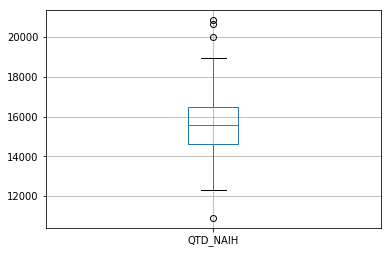

In [100]:
df_ts.boxplot(column='QTD_NAIH')

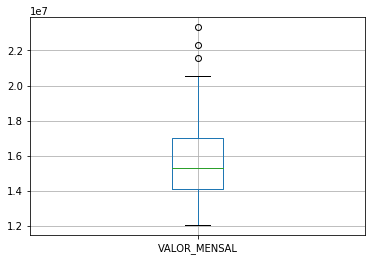

In [101]:
df_ts.boxplot(column='VALOR_MENSAL')

**Tendência**

O gráfico abaixo foi formado apartir da soma das internações dos mêses de todos os anos e em todos eles vemos uma tendência as internações aumentarem ao logo do ano e apartir de agosto decair até dezembro.

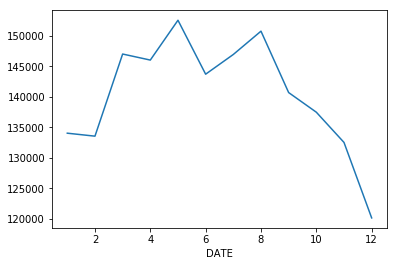

In [124]:
df_ts.groupby(df_ts.index.month)['QTD_NAIH'].sum().plot()

**Modelo SARIMAX Machine Learning**

O modelo SARIMAX é especificado por:
$(p,d,q)-(P,D,Q)s$

- $(p,d,q)$ -> Configuação de tendência de componentes do ARIMA
- $(P,D,Q)$ -> Configuração de Sazonalidade do ARIMA (SARIMA)
- $s$ -> Número de passos (steps) do período sazonal Ex: (12 para 12 mêses, 30 para 30 dias)

No caso do modelo em questão foi utilizado s = 12 (12 mêses)

Para definir a melhor especificação optei por um método mais automatizado no qual testa todas as combinações possíveis de p, d, q , P, D, Q com valores 0 e 1. 

**results.aic**


Cada especificação foi analisada com o indicador AIC mostra o quanto o modelo se encaixou nos dados, quanto menor melhor.

In [83]:
p = d = q = range(0, 2)

In [84]:
pdq = list(product(p, d, q))

In [85]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

In [63]:
warnings.filterwarnings("ignore")
lower_aic = None

for param in pdq:

    for param_seasonal in seasonal_pdq:
            
        mod = sm.tsa.statespace.SARIMAX(df_ts['QTD_NAIH'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        if lower_aic == None:
            lower_aic = results.aic
            
        if lower_aic > results.aic:
                lower_aic = results.aic
                opt_pdq = param
                opt_pdq_seasonal = param_seasonal
            
print('The best model is: ',opt_pdq,'x',opt_pdq_seasonal,'  - AIC: ',lower_aic)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2373.0627427670593
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2048.47696085024
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1693.0980430797858
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1481.9345473162273
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1711.5674742664999
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1693.465464599374
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1494.4830163401966
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1481.1573216789177
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2223.587708164753
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2005.7873379988866
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1643.280599005199
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1431.459321818493
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1690.8383982871746
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1639.536949733573
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1467.7274365462988
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1433.0544771219757
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1825.85063424484
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1608.8783471569827
A

**Resultados** 

Após testar todas as combinações possíveis, chegamos ao resultado de que a melhor configuração foi:

$(p,d,q)-(P,D,Q)s$

(1, 1, 1) x (0, 1, 1, 12) - AIC: 1377

Para visualizarmos melhor o modelo selecionados usamos a função (plot_diagnostics), e podemos verificar que a distribuição se assemelha muito a de uma normal (QQ Plot, KDE), o gráfico (Standardized residual) nos mostra uma variância uniforme em torno de 0, e (Correlogram) mostra que os erros residuais não são autocorrelatos, e isso implica que não há um padrão de erros sem explicação no modelo.

In [64]:
mod = sm.tsa.statespace.SARIMAX(df_ts['QTD_NAIH'],
                                order=opt_pdq,
                                seasonal_order=opt_pdq_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6097      0.140      4.353      0.000       0.335       0.884
ma.L1         -0.9047      0.083    -10.952      0.000      -1.067      -0.743
ma.S.L12      -0.7421      0.133     -5.580      0.000      -1.003      -0.481
sigma2      1.171e+06   2.14e+05      5.486      0.000    7.53e+05    1.59e+06


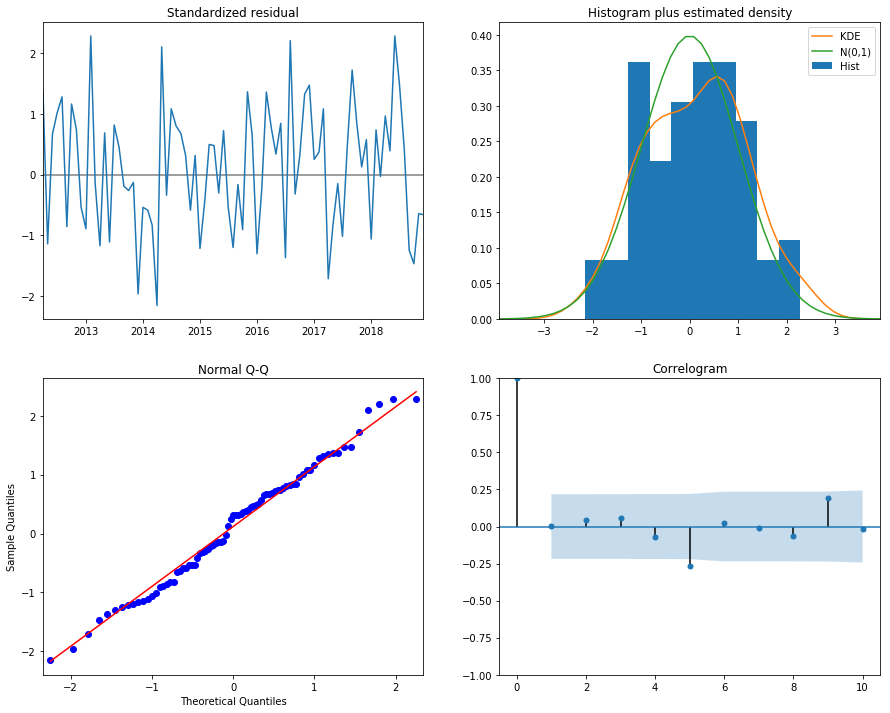

In [65]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [131]:
pred = results.get_prediction(start=1, dynamic=False)
pred_ci = pred.conf_int()

**Comparação de Modelos**

Aqui realizo a comparação entre o modelo de machine learning (SARIMAX) criado e os dados reais.

Para realizar a comparação optei por não incluir a coluna (VALOR_MENSAL) para melhor visualização dos dados.

Linha azul são os dados de quantidade de internações reais, e a linha verde é o que o modelo previu.

In [102]:
df_naih = df_ts.drop('VALOR_MENSAL', axis=1)

In [103]:
df_naih.head()

,QTD_NAIH
DATE,
2010-01-01,16302
2010-02-01,13506
2010-03-01,16704
2010-04-01,16422
2010-05-01,17032


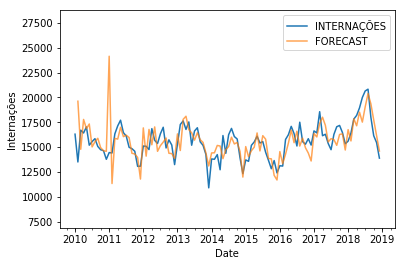

In [134]:
ax = df_naih['2010':].plot(label='Observed')

pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='w', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Internações')
plt.legend(["INTERNAÇÕES", "FORECAST"])

plt.show()

**Previsão**

Aqui podemos ver a previsão de fato após o final de 2018 o que o programa prevê para 2019 de internações na secretaria de saúde.

In [136]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

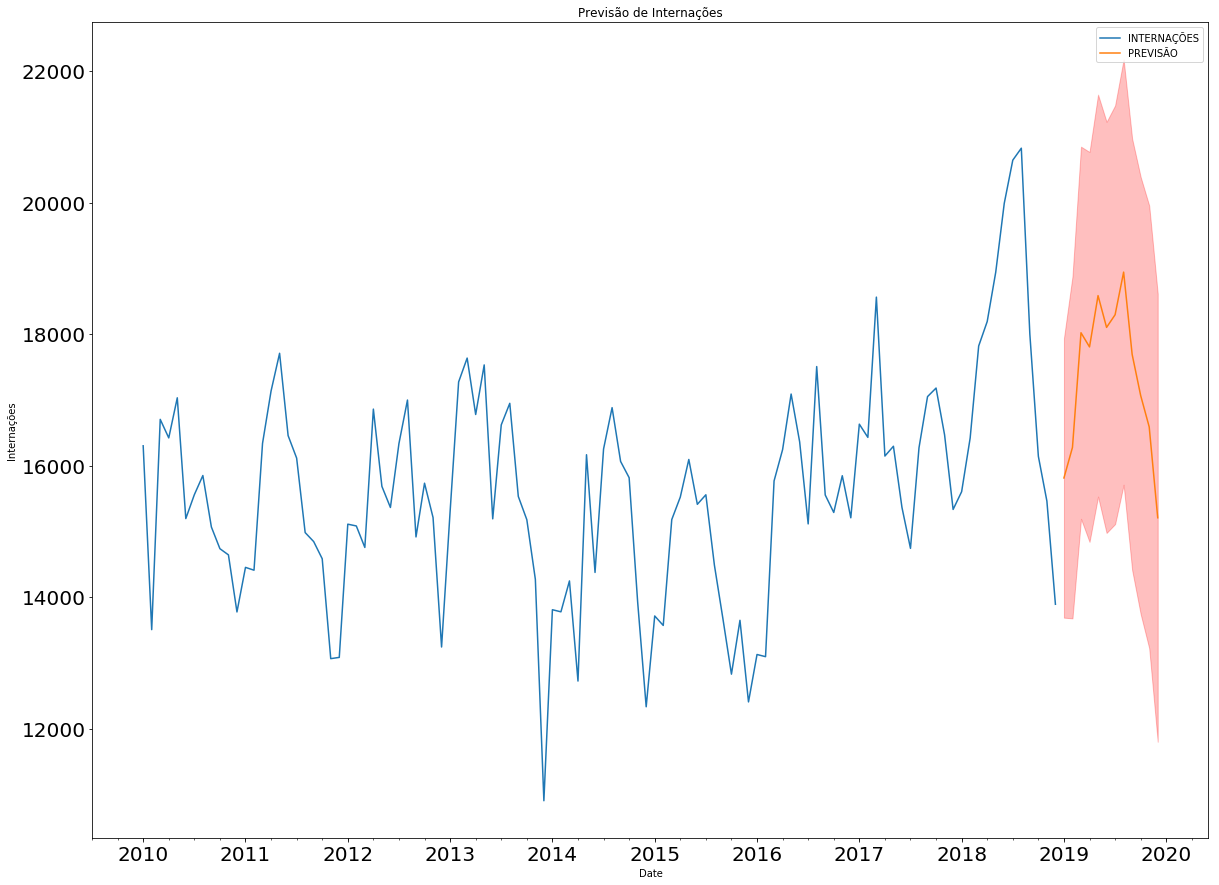

In [138]:
ax = df_naih.plot(label='Internações', figsize=(20, 15), fontsize=20, title='Previsão de Internações',legend=True)

pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Internações')

ax.legend(["INTERNAÇÕES", "PREVISÃO"]);
plt.show()

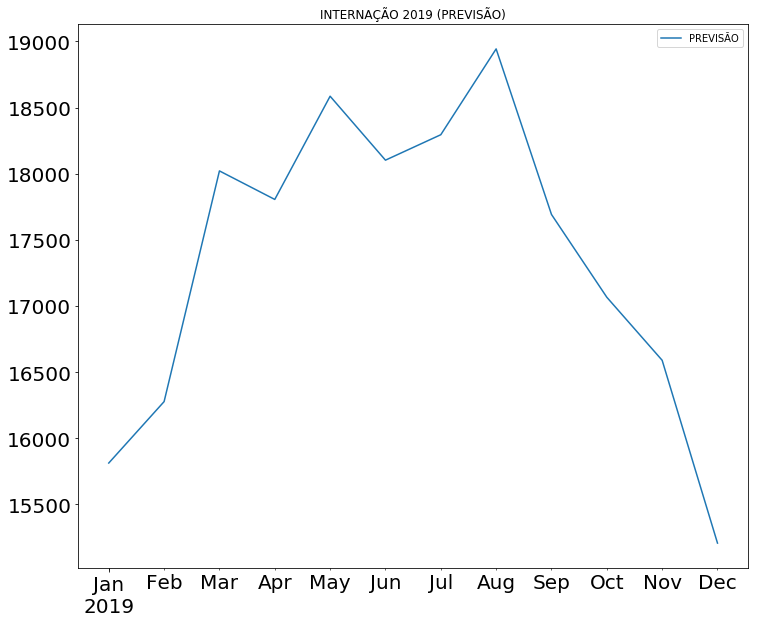

In [139]:
pred_uc.predicted_mean.plot(label='PREVISÃO', figsize=(12, 10), fontsize=20, title='INTERNAÇÃO 2019 (PREVISÃO)',legend=True)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Internações')

plt.legend()
plt.show()